# Homework 8

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2023-11-20 11:54:16.431707: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
np.random.seed(1)
tf.random.set_seed(1)

## Dataset

In [4]:
! wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip

In [5]:
! unzip data.zip

## Model

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

In [7]:
def make_model():

    # Create a Sequential model
    model = Sequential()
    
    input_shape = (150, 150, 3)

    # Add a Convolutional layer
    filters = 32
    kernel_size = (3,3)
    activation_conv = 'relu'
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation=activation_conv, input_shape=input_shape))

    # Add a MaxPooling layer
    pool_size = (2, 2)
    model.add(MaxPooling2D(pool_size=pool_size))

    # Flatten the result to vectors
    model.add(Flatten())

    # Add a Dense layer with 64 neurons and 'relu' activation
    units_dense = 64
    activation_dense = 'relu'
    model.add(Dense(units=units_dense, activation=activation_dense))

    # Add the output layer with 1 neuron and appropriate activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with SGD optimizer
    sgd = SGD(lr=0.002, momentum=0.8)
    loss = keras.losses.binary_crossentropy
    
    model.compile(
                optimizer=sgd, 
                loss=loss, 
                metrics=['accuracy']
    )
              
    return model

## Question 2

In [8]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

2023-11-20 11:54:18.688450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 11:54:18.695642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 11:54:18.696241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 11:54:18.697149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

## Generators and Training

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Specify the path to your train and test directories
train_dir = './data/train/'
test_dir = './data/test/'

In [12]:
# Set up the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # For binary classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # For binary classification
    shuffle=True
)


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


`class_mode` should be `binary`

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


2023-11-20 11:54:20.945994: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-20 11:54:21.582435: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 11:54:21.582916: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 11:54:21.582945: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-20 11:54:21.583489: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 11:54:21.583561: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 11s 47ms/step - loss: 0.6548 - accuracy: 0.5893 - val_loss: 0.6001 - val_accuracy: 0.6808
Epoch 2/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5860 - accuracy: 0.6834 - val_loss: 0.5580 - val_accuracy: 0.7168
Epoch 3/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5445 - accuracy: 0.7272 - val_loss: 0.5721 - val_accuracy: 0.7037
Epoch 4/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5195 - accuracy: 0.7512 - val_loss: 0.5324 - val_accuracy: 0.7516
Epoch 5/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5111 - accuracy: 0.7561 - val_loss: 0.5460 - val_accuracy: 0.7200
Epoch 6/10
184/184 [==============================] - 8s 45ms/step - loss: 0.4802 - accuracy: 0.7789 - val_loss: 0.5165 - val_accuracy: 0.7625
Epoch 7/10
184/184 [==============================] - 8s 45ms/step - loss: 0.4603 - accuracy: 0.7958 - val_loss: 0.5139 - val_accuracy: 0.7505
Epoch 8/1

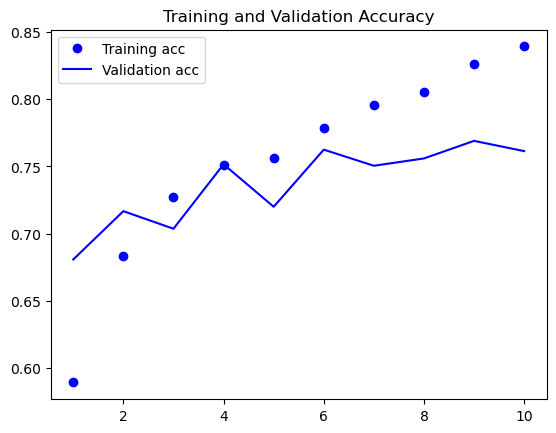

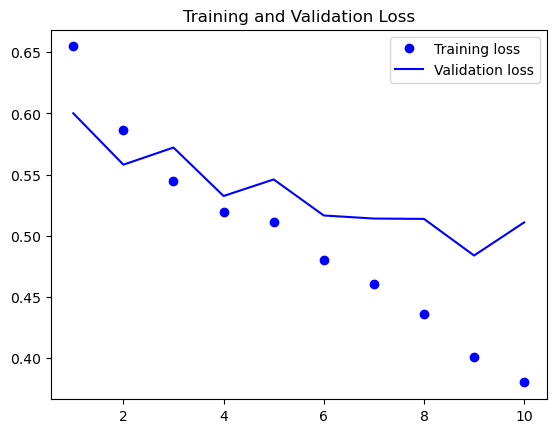

In [14]:
# Credit for code: https://github.com/abhirup-ghosh/machine-learning-zoomcamp/blob/master/cohorts/2022/08-deep-learning/homework_8.ipynb

#@ PLOTTING LOSS AND ACCURACY:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## Question 3

In [15]:
acc_median = np.median(acc)
acc_median

0.7674734890460968

## Question 4

In [16]:
loss_std = np.std(loss)
loss_std

0.0801631056249691

## Data augmentation

In [17]:
train_gen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=50,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Set up the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # For binary classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # For binary classification
    shuffle=True
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [20]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 8s 46ms/step - loss: 0.3447 - accuracy: 0.8572 - val_loss: 0.5063 - val_accuracy: 0.7538
Epoch 2/10
184/184 [==============================] - 8s 44ms/step - loss: 0.3102 - accuracy: 0.8776 - val_loss: 0.5169 - val_accuracy: 0.7560
Epoch 3/10
184/184 [==============================] - 8s 45ms/step - loss: 0.2737 - accuracy: 0.8991 - val_loss: 0.5617 - val_accuracy: 0.7527
Epoch 4/10
184/184 [==============================] - 8s 44ms/step - loss: 0.2490 - accuracy: 0.9124 - val_loss: 0.5455 - val_accuracy: 0.7603
Epoch 5/10
184/184 [==============================] - 8s 44ms/step - loss: 0.2099 - accuracy: 0.9323 - val_loss: 0.5207 - val_accuracy: 0.7789
Epoch 6/10
184/184 [==============================] - 8s 45ms/step - loss: 0.1805 - accuracy: 0.9402 - val_loss: 0.6276 - val_accuracy: 0.7560
Epoch 7/10
184/184 [==============================] - 8s 45ms/step - loss: 0.1476 - accuracy: 0.9573 - val_loss: 0.6166 - val_accuracy: 0.7582

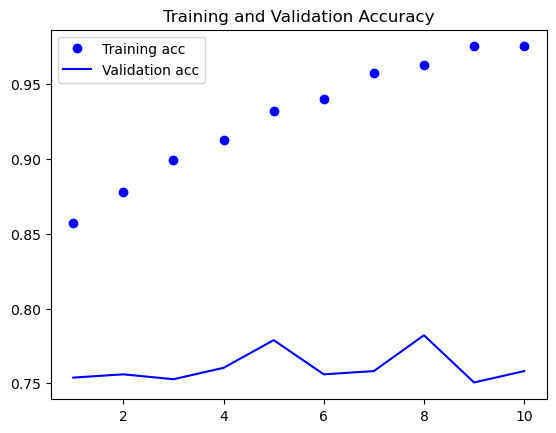

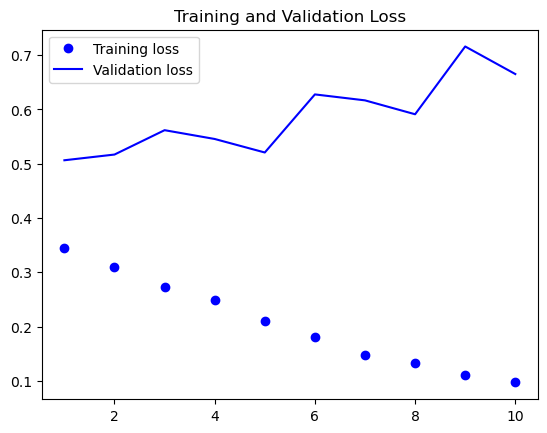

In [21]:
# Credit for code: https://github.com/abhirup-ghosh/machine-learning-zoomcamp/blob/master/cohorts/2022/08-deep-learning/homework_8.ipynb

#@ PLOTTING LOSS AND ACCURACY:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## Question 5

In [22]:
loss_val = np.mean(val_loss)
loss_val

0.5867461502552033

## Question 6

In [23]:
val_acc[5:10]

[0.7559912800788879,
 0.758169949054718,
 0.7821350693702698,
 0.7505446672439575,
 0.758169949054718]

In [24]:
acc_val = np.mean(val_acc[5:10])
acc_val

0.7610021829605103